## Required Libraries

In [159]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pylab as plt
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error

%matplotlib inline

### Import first dataset = day.csv

In [160]:
# Load the CSV file into a DataFrame
df_day = pd.read_csv('day.csv')

# Display the DataFrame
print(df_day)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

### Import second dataset = hour

In [161]:
# Load the CSV file into a DataFrame
df_hour = pd.read_csv('hour.csv')

# Display the DataFrame
print(df_hour)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [162]:
df_day.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


### Make day  confusion Matrix 

In [163]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [164]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [165]:
df_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [166]:
# Define the cost per hour for casual and registered, in dollars:
casual_cost_per_hour = 3.50
registered_cost_per_hour = 0.08

In [167]:
# Create new columns for Casual_Revenue, Registered_Revenue, and Total_Revenue
df_hour['Casual_Revenue'] = df_hour['casual'] * casual_cost_per_hour
df_hour['Registered_Revenue'] = df_hour['registered'] * registered_cost_per_hour
df_hour['Total_Revenue'] = df_hour['Casual_Revenue'] + df_hour['Registered_Revenue']


In [168]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Casual_Revenue,Registered_Revenue,Total_Revenue
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,10.5,1.04,11.54
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,28.0,2.56,30.56
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,17.5,2.16,19.66
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,10.5,0.80,11.30
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0.0,0.08,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,38.5,8.64,47.14
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,28.0,6.48,34.48
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,24.5,6.64,31.14
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,45.5,3.84,49.34


## EDA and Preprocessing

In [169]:
# Identify null values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [170]:
# Identify null values
df_hour.isna().sum()

instant               0
dteday                0
season                0
yr                    0
mnth                  0
hr                    0
holiday               0
weekday               0
workingday            0
weathersit            0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual                0
registered            0
cnt                   0
Casual_Revenue        0
Registered_Revenue    0
Total_Revenue         0
dtype: int64

In [171]:
df_day.shape

(731, 16)

In [172]:
df_hour.shape

(17379, 20)

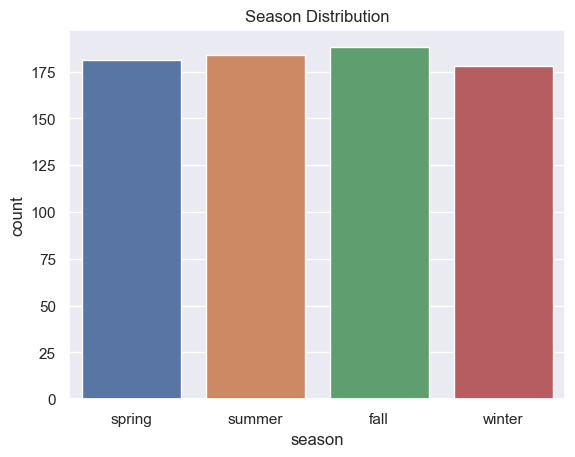

In [173]:
# Create a dictionary to map numerical values to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create a copy of your DataFrame
new_day = df_day.copy()

# Map the 'season' column using the dictionary
new_day['season'] = new_day['season'].map(season_mapping)

# Convert the 'season' column to categorical type
new_day['season'] = pd.Categorical(new_day['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

# Visualize the distribution of seasons using a count plot
sns.set(style="darkgrid")
sns.countplot(x=new_day['season'])
plt.title('Season Distribution')
plt.show()

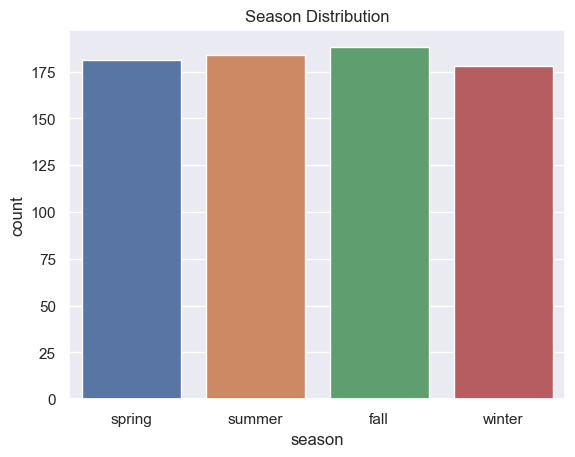

In [174]:
# Create a dictionary to map numerical values to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create a copy of your DataFrame
new_hour = df_hour.copy()

# Map the 'season' column using the dictionary
new_hour['season'] = new_hour['season'].map(season_mapping)

# Convert the 'season' column to categorical type
new_hour['season'] = pd.Categorical(new_hour['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

# Visualize the distribution of seasons using a count plot
sns.set(style="darkgrid")
sns.countplot(x=new_day['season'])
plt.title('Season Distribution')
plt.show()

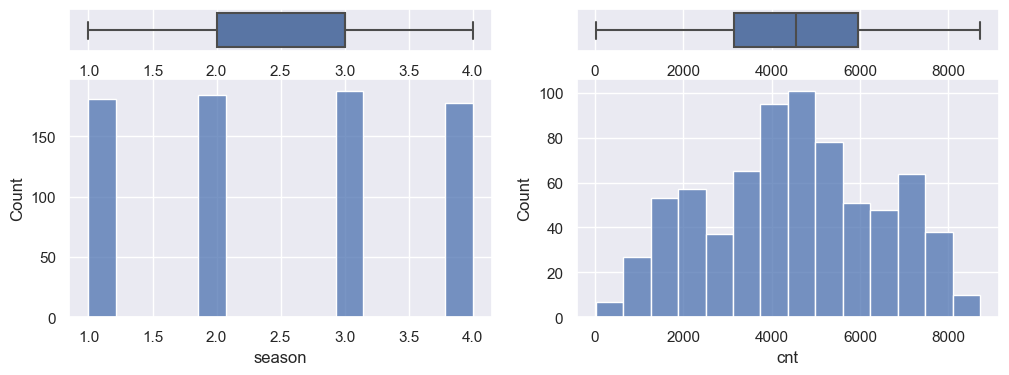

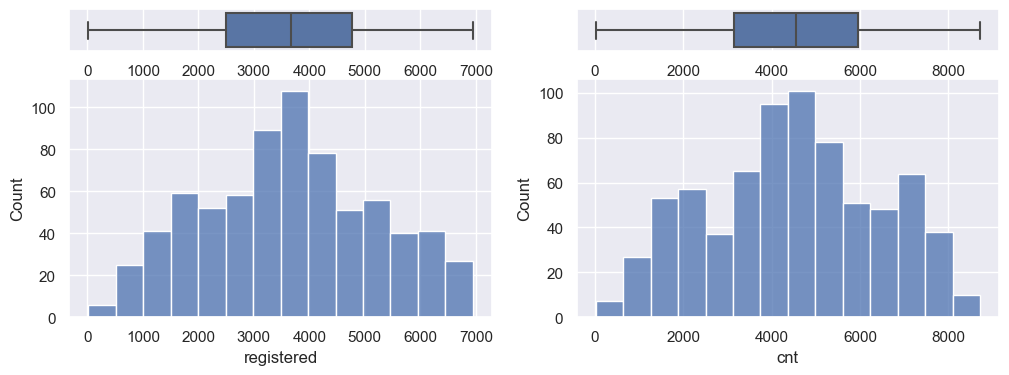

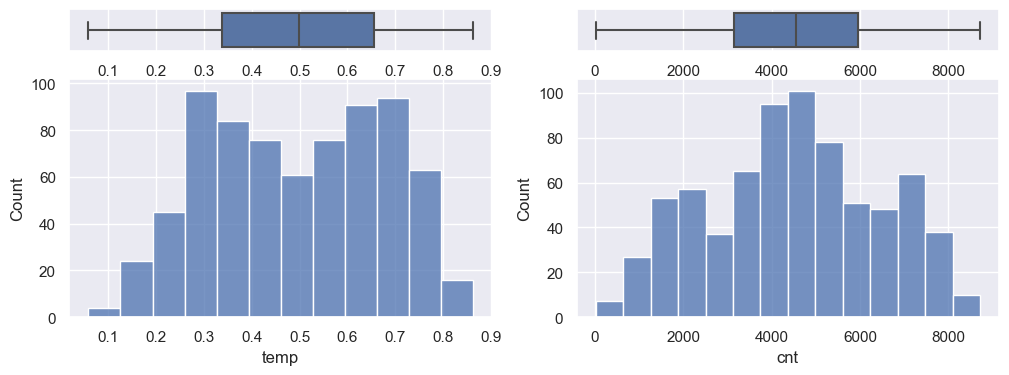

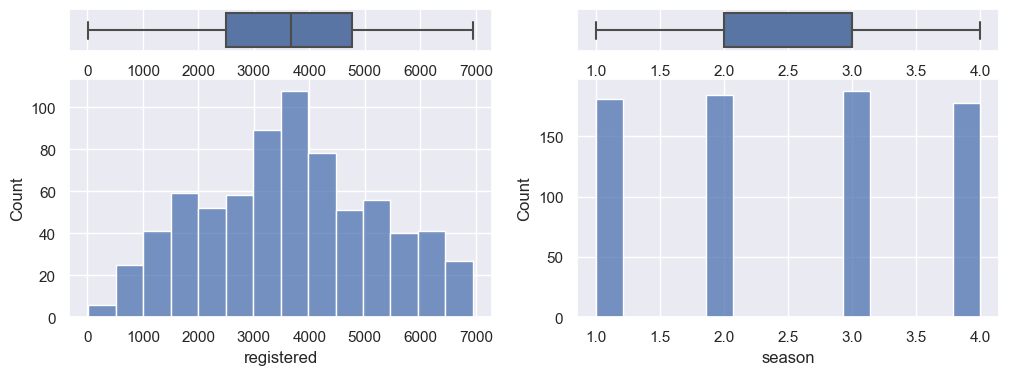

In [175]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()

print_box_hist(df_day, "season", "cnt")
print_box_hist(df_day, "registered", "cnt")
print_box_hist(df_day, "temp", "cnt")
print_box_hist(df_day, "registered", "season")


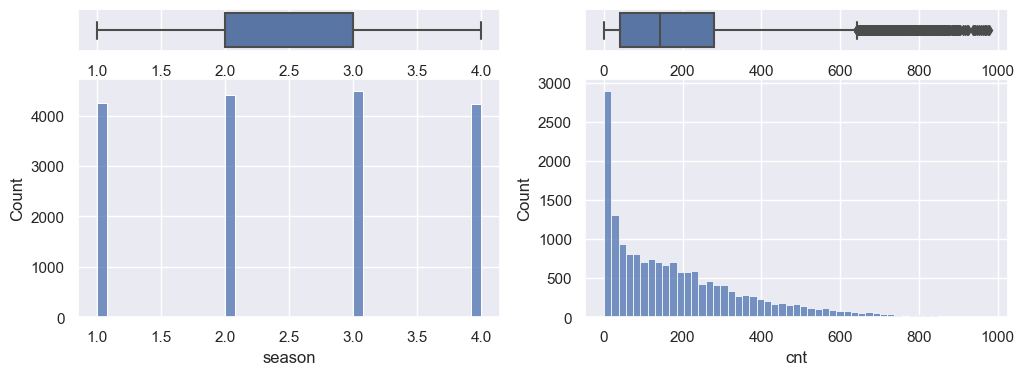

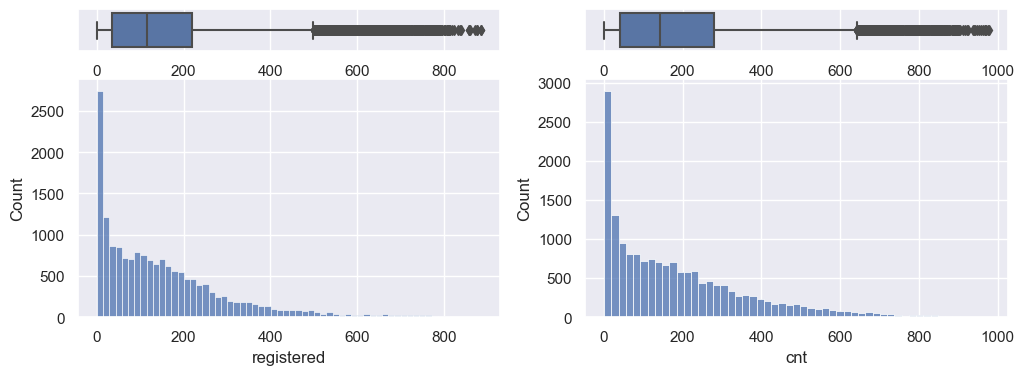

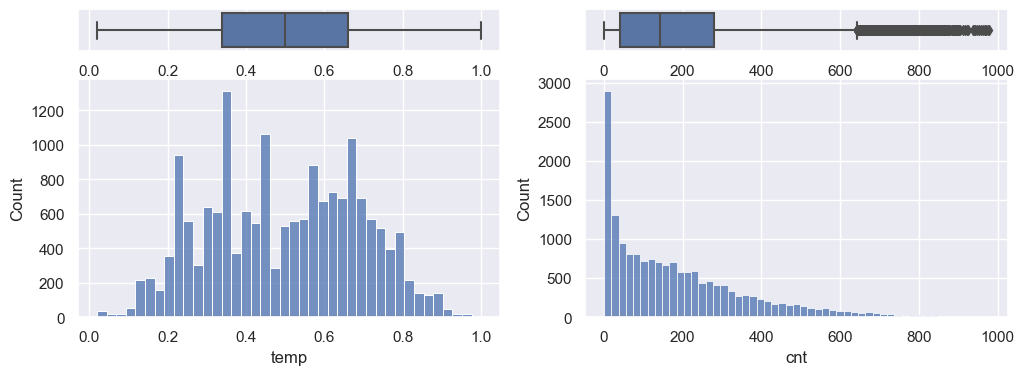

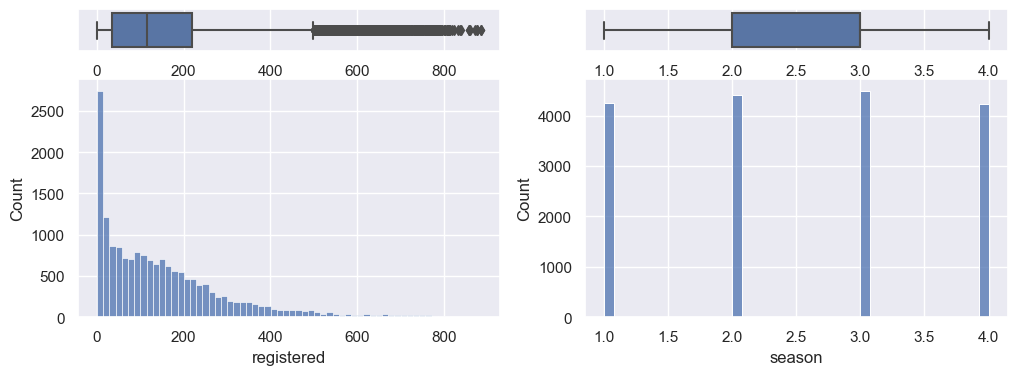

In [176]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()

print_box_hist(df_hour, "season", "cnt")
print_box_hist(df_hour, "registered", "cnt")
print_box_hist(df_hour, "temp", "cnt")
print_box_hist(df_hour, "registered", "season")

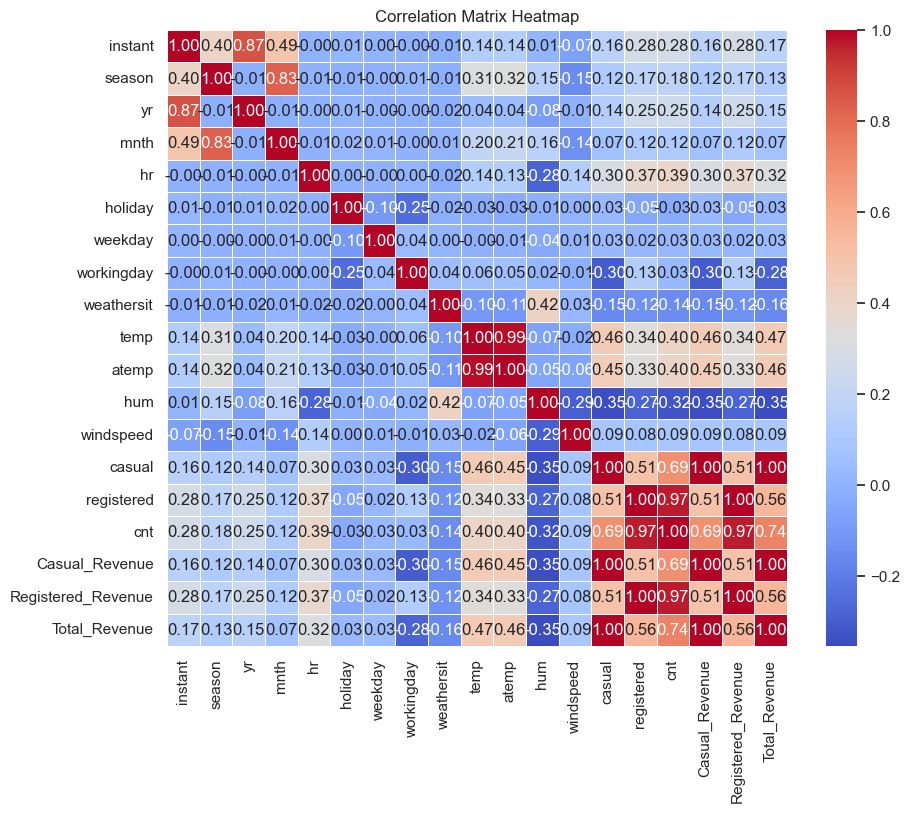

In [177]:
# Numerical columns for the correlation matrix
numerical_columns = df_hour.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Numerical columns for the correlation matrix
numerical_columns = df_day.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# build histograms to get distribtuions

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings

# Suppress specific Seaborn warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_day['registered'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Registered people")

plt.subplot(2, 3, 2)
stats.probplot(df_day['registered'], dist="norm", plot=plt)
plt.title('Registered QQ Plot')

plt.subplot(2, 3, 3)
sns.histplot(df_day['mnth'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Month")

plt.subplot(2, 3, 4)
stats.probplot(df_day['mnth'], dist="norm", plot=plt)
plt.title('Month QQ Plot')

plt.subplot(2, 3, 5)
sns.histplot(df_day['temp'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Temperature")

plt.subplot(2, 3, 6)
stats.probplot(df_day['temp'], dist="norm", plot=plt)
plt.title('Temperature QQ Plot')

plt.tight_layout()
plt.show()


In [ ]:
#Check for data types
df_day.info()

In [ ]:
df_hour.info()

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = df_hour.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Hourly Bike Rentals by Day of the Week')
plt.show()

In [ ]:
heatmap_data = df_hour.pivot_table(index='season', columns='weekday', values='cnt', aggfunc='mean')

# Define season labels
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f', xticklabels=range(7))
plt.title('Hourly Bike Rentals by Season')
plt.xlabel('Day of Week')
plt.ylabel('Season')
plt.xticks(rotation=0) 
plt.yticks(ticks=range(1, 5), labels=season_labels, rotation=45) 
plt.show()

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = df_day.pivot_table(index='weekday', columns='season', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Daily Bike Rentals by Season')
plt.show()

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = df_hour.pivot_table(index='weekday', columns='season', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Hourly Bike Rentals by Season')
plt.show()

In [ ]:
#Plot average Hourly bike rentals by time of day

hourly_average = df_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Time of Day')
plt.grid(True)
plt.show()

In [ ]:
#Plot average Hourly bike rentals by time of day

hourly_average = df_hour.groupby('temp')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-')
plt.xlabel('Temperature C')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Temperature')
plt.grid(True)
plt.show()

In [ ]:
#Plot average daily bike rentals by season
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

hourly_average = df_hour.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-', color='b', markersize=8, label='Average Rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Season')
plt.xticks(hourly_average.index, season_names)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Plot average daily bike rentals by season
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

hourly_average = df_day.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-', color='b', markersize=8, label='Average Rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Daily Bike Rentals by Season')
plt.xticks(hourly_average.index, season_names)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df_hour['rental_type'] = df_hour['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Group the data by rental type and calculate the average rentals for each group
rental_type_average = df_hour.groupby('rental_type')['cnt'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
rental_type_average.plot(kind='bar', color=['red', 'lightblue'])
plt.xlabel('Rental Type')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Bike Rentals on Holidays vs. Non-Holidays')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [ ]:

# Create a new column 'date' to store the date in datetime format
df_day['date'] = pd.to_datetime(df_day['dteday'])
df_day.sort_values('date', inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the cumulative counts for casual and registered users as stacked areas
ax.fill_between(df_day['date'], df_day['casual'].cumsum(), label='Casual', alpha=0.7)
ax.fill_between(df_day['date'], df_day['registered'].cumsum(), df_day['casual'].cumsum(), label='Registered', alpha=0.7)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Count of Rentals')
ax.set_title('Cumulative Count of Rentals Over Time')

# Add a legend
ax.legend()
plt.grid(True)

plt.show()


In [ ]:
# Make a copy of df_hour to work with the revenue data
revenue_data = df_hour.copy()

# Group by weekday and get sum of total revenue per weekday
revenue_by_weekday = revenue_data.groupby('weekday')['Total_Revenue'].sum().reset_index()

# Map the number in the weekday to its actual day name
weekday_map = {0: 'Sunday', 
               1: 'Monday', 
               2: 'Tuesday', 
               3: 'Wednesday', 
               4: 'Thursday', 
               5: 'Friday', 
               6: 'Saturday'}

revenue_by_weekday['weekday'] = revenue_by_weekday['weekday'].map(weekday_map)

# Sort the dataframe by 'weekday'
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
revenue_by_weekday['weekday'] = pd.Categorical(revenue_by_weekday['weekday'], categories=ordered_days, ordered=True)
revenue_by_weekday = revenue_by_weekday.sort_values('weekday')

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='Total_Revenue', data=revenue_by_weekday, palette='viridis')
plt.title('Total Revenue by Weekday')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Weekday')

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(10, 14), sharex=True)  

for i, (weekday, group) in enumerate(revenue_data.groupby('weekday')):
    ax = axes[i]
    group = group.sort_values('hr')  # Sort values by hour to make sure they are in order
    sns.barplot(x='hr', y='Total_Revenue', data=group, ax=ax, palette='viridis')
    ax.set_title(weekday_map[weekday])
    ax.set_ylabel('Total Revenue ($)')
    ax.set_xlabel('Hour of the Day')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='mnth', y='Total_Revenue', data=revenue_data)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Distribution of Total Revenue by Month')
plt.show()

In [ ]:
# Map the 'season' column using the dictionary
df_hour['season'] = df_hour['season'].map(season_mapping)

plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='Total_Revenue', data=revenue_data)
plt.xlabel('Season')
plt.ylabel('Total Revenue ($)')
plt.title('Distribution of Total Revenue by Season')
plt.show()

In [ ]:
# # Map season values to their corresponding names
# season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
# df_hour['season_name'] = df_hour['season'].map(season_mapping)

# # Map weathersit values to their descriptions
# weathersit_mapping = {
#     1: 'Clear, Few clouds, Partly cloudy',
#     2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
#     3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
#     4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
# }
# df_hour['weathersit_desc'] = df_hour['weathersit'].map(weathersit_mapping)

# # Scatter plot of season vs temp with different colors for each weathersit
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_hour, x='season_name', y='temp', hue='weathersit_desc', palette='magma')
# plt.title('Season vs. Temperature by Weather Situation')
# plt.xlabel('Season')
# plt.ylabel('Temperature')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend(title='Weather Situation')
# plt.show()

# # Grouped bar chart of season vs weathersit and their average temp
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_hour, x='season_name', y='temp', hue='weathersit_desc', ci=None, palette='magma')
# plt.title('Season vs. Temperature by Weather Situation (Average)')
# plt.xlabel('Season')
# plt.ylabel('Average Temperature')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend(title='Weather Situation')
# plt.show()




In [ ]:
# # Map season values to their corresponding names
# season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
# df_hour['season_name'] = df_hour['season'].map(season_mapping)

# # Create a boxplot or violin plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_hour, x='season_name', y='temp', palette='magma')
# plt.title('Temperature vs. Season')
# plt.xlabel('Season')
# plt.ylabel('Temperature')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Custom colors for each month
colors = sns.color_palette('magma', n_colors=12)

# Plot temperature vs. month with lines and shading
for month in range(1, 13):
    subset = df_hour[df_hour['mnth'] == month]
    plt.plot(subset['mnth'], subset['temp'], label=f'Month {month}', color=colors[month-1], marker='o', markersize=5, linewidth=2)
    plt.fill_between(subset['mnth'], subset['temp'].min(), subset['temp'].max(), alpha=0.2, color=colors[month-1])

plt.title('Temperature vs. Month with Shading')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Months', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()




In [ ]:
df_hour.head()

In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_hour.head()

In [ ]:
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour.drop(['dteday'], axis=1, inplace=True)

pd.set_option('display.max_columns', None)

df_hour.head()

In [ ]:
X = df_hour.drop(['Total_Revenue'], axis=1) 
y = df_hour['Total_Revenue'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

### Pre-processing for models

In [ ]:
# Drop columns
cols_to_drop = ['instant', 'yr', 'mnth', 'workingday', 'rental_type', 'casual', 'registered', 'Casual_Revenue', 'Registered_Revenue']
X_train = X_train.drop(cols_to_drop, axis=1)

In [ ]:
# Create dummies for categorical columns
X_train = pd.get_dummies(X_train, columns=['season', 'weekday', 'weathersit'], drop_first=True)

In [ ]:
# Scale variables
scaler = StandardScaler()
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

### Ridge Regression 

In [ ]:
from skopt import BayesSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes

In [ ]:
# Define the hyperparameter search space
param_space = {
    'alpha': (1e-6, 100.0, 'log-uniform'),  # Range for alpha with log-uniform distribution
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

# Create a Ridge regression model
ridge = Ridge()

# Perform Bayesian Optimization with cross-validation
opt = BayesSearchCV(ridge, param_space, n_iter=50, cv=5, n_jobs=-1, verbose=1)

# Fit the optimizer on the data to find the best hyperparameters
opt.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters:", opt.best_params_)

# Fit the Ridge model with the best hyperparameters
best_ridge = opt.best_estimator_
best_ridge.fit(X, y)

In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters:", opt.best_params_)

# Fit the Ridge model with the best hyperparameters
best_ridge = opt.best_estimator_
best_ridge.fit(X, y)

In [ ]:
# Create and fit the RidgeCV model on the training data
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred_rr = ridge_cv.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

In [ ]:
# Create a learning curve for your Lasso model
train_sizes, train_scores, test_scores = learning_curve(
    ridge_cv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of training and test scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Number of training examples')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.title('Learning Curve for Ridge Regression Model')
plt.show()

### Lasso Regression

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter search space
param_space = {
    'alpha': Real(1e-6, 1e+6, prior='log-uniform'),
}

# Create a Bayesian Optimization instance with cross-validation
opt = BayesSearchCV(
    estimator=Lasso(),
    search_spaces=param_space,
    scoring='neg_mean_squared_error',  # Specify the metric to optimize
    n_iter=50,  # Number of optimization iterations
    cv=5,  # Number of cross-validation folds
    random_state=42,
)

# Fit the Bayesian Optimization model to your data
opt.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = opt.best_params_

# Get the best alpha from Bayesian Optimization
best_alpha = best_params['alpha']

# Create and fit the Lasso model with the best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_predlr = lasso.predict(X_test_scaled)

# # Evaluate the model using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred_lasso)
# print(f"Mean Squared Error: {mse}")

In [ ]:
# Calculate evaluation metrics
maelr = mean_absolute_error(y_test, y_predlr)
mselr = mean_squared_error(y_test, y_predlr)
rmselr = mean_squared_error(y_test, y_predlr, squared=False)
r2lr = r2_score(y_test, y_predlr)

# Print the metrics
print(f"Mean Absolute Error (MAE): {maelr}")
print(f"Mean Squared Error (MSE): {mselr}")
print(f"Root Mean Squared Error (RMSE): {rmselr}")
print(f"R-squared (R2): {r2lr}")

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


# Create a learning curve for your Lasso model
train_sizes, train_scores, test_scores = learning_curve(
    lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of training and test scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Number of training examples')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.title('Learning Curve for Lasso Model')
plt.show()